EDA FOR SOLAR PREDICTON MODEL

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [277]:
df1=pd.read_csv('2018_solardata.csv')

In [279]:
df1.head()

,Year,Month,Day,Hour,GHI,DNI,DHI,Temperature,Pressure,Solar Zenith Angle,Surface Albedo,Cloud Type,Relative Humidity,Wind Speed
0,2018,1,1,0,0,0,0,14.2,951,177.95,0.17,0,18.23,1.0
1,2018,1,1,1,0,0,0,14.0,951,164.33,0.17,0,18.38,0.9
2,2018,1,1,2,0,0,0,13.8,951,150.54,0.17,0,18.67,0.8
3,2018,1,1,3,0,0,0,13.3,951,136.83,0.17,0,19.35,0.8
4,2018,1,1,4,0,0,0,13.0,951,123.25,0.17,0,19.73,0.9


In [281]:
df2=pd.read_csv('2019_solardata.csv')
df3=pd.read_csv('2020_solardata.csv')

In [283]:
df2.head()

,Year,Month,Day,Hour,GHI,DNI,DHI,Temperature,Pressure,Solar Zenith Angle,Surface Albedo,Cloud Type,Relative Humidity,Wind Speed
0,2019,1,1,0,0,0,0,12.0,947,177.92,0.17,3,99.31,3.1
1,2019,1,1,1,0,0,0,11.7,946,164.30,0.17,0,100.00,3.2
2,2019,1,1,2,0,0,0,11.6,946,150.52,0.17,3,100.00,3.1
3,2019,1,1,3,0,0,0,11.5,946,136.81,0.17,3,100.00,3.1
4,2019,1,1,4,0,0,0,11.5,947,123.23,0.17,3,100.00,3.2


In [285]:
df3.head()


,Year,Month,Day,Hour,GHI,DNI,DHI,Temperature,Pressure,Solar Zenith Angle,Surface Albedo,Cloud Type,Relative Humidity,Wind Speed
0,2020,1,1,0,0,0,0,14.0,947,178.01,0.17,0,76.59,1.4
1,2020,1,1,1,0,0,0,13.4,947,164.38,0.17,0,79.06,1.3
2,2020,1,1,2,0,0,0,12.9,946,150.60,0.17,0,80.73,1.4
3,2020,1,1,3,0,0,0,12.5,947,136.88,0.17,0,81.94,1.4
4,2020,1,1,4,0,0,0,12.2,947,123.30,0.17,0,82.45,1.6


In [287]:
df=pd.concat([df1,df2,df3], ignore_index=True)

In [289]:
print(df.shape)


(26280, 14)


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                26280 non-null  int64  
 1   Month               26280 non-null  int64  
 2   Day                 26280 non-null  int64  
 3   Hour                26280 non-null  int64  
 4   GHI                 26280 non-null  int64  
 5   DNI                 26280 non-null  int64  
 6   DHI                 26280 non-null  int64  
 7   Temperature         26280 non-null  float64
 8   Pressure            26280 non-null  int64  
 9   Solar Zenith Angle  26280 non-null  float64
 10  Surface Albedo      26280 non-null  float64
 11  Cloud Type          26280 non-null  int64  
 12  Relative Humidity   26280 non-null  float64
 13  Wind Speed          26280 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 2.8 MB


In [293]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
GHI                   0
DNI                   0
DHI                   0
Temperature           0
Pressure              0
Solar Zenith Angle    0
Surface Albedo        0
Cloud Type            0
Relative Humidity     0
Wind Speed            0
dtype: int64

In [295]:
df.describe()

,Year,Month,Day,Hour,GHI,DNI,DHI,Temperature,Pressure,Solar Zenith Angle,Surface Albedo,Cloud Type,Relative Humidity,Wind Speed
count,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000
mean,2019.000000,6.526027,15.720548,11.500000,221.031088,205.142656,86.755061,24.910186,942.096119,89.768653,0.179991,2.735388,56.899099,2.302485
std,0.816512,3.447917,8.796414,6.922318,308.431000,300.998025,120.738042,7.073154,5.288989,44.125791,0.013204,3.117740,31.687943,1.349621
min,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.300000,926.000000,1.220000,0.160000,0.000000,4.620000,0.100000
25%,2018.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,20.800000,938.000000,52.327500,0.170000,0.000000,26.150000,1.200000
50%,2019.000000,7.000000,16.000000,11.500000,0.000000,0.000000,0.000000,24.600000,943.000000,89.290000,0.180000,1.000000,55.825000,2.000000
75%,2020.000000,10.000000,23.000000,17.250000,436.000000,415.250000,157.000000,28.900000,946.000000,127.842500,0.190000,6.000000,89.100000,3.200000
max,2020.000000,12.000000,31.000000,23.000000,1072.000000,1042.000000,520.000000,45.500000,955.000000,179.240000,0.210000,9.000000,100.000000,8.200000


In [297]:
df['GHI'].mode()


0    0
Name: GHI, dtype: int64

In [299]:
df.to_csv('final_data.csv',index=False)

In [301]:
print(df.shape)

(26280, 14)


##ROUNDING OFF THE DECIMAL NUMBERS UPTO 4 PLACES

In [304]:
df.head()

,Year,Month,Day,Hour,GHI,DNI,DHI,Temperature,Pressure,Solar Zenith Angle,Surface Albedo,Cloud Type,Relative Humidity,Wind Speed
0,2018,1,1,0,0,0,0,14.2,951,177.95,0.17,0,18.23,1.0
1,2018,1,1,1,0,0,0,14.0,951,164.33,0.17,0,18.38,0.9
2,2018,1,1,2,0,0,0,13.8,951,150.54,0.17,0,18.67,0.8
3,2018,1,1,3,0,0,0,13.3,951,136.83,0.17,0,19.35,0.8
4,2018,1,1,4,0,0,0,13.0,951,123.25,0.17,0,19.73,0.9


In [306]:
df.dtypes


Year                    int64
Month                   int64
Day                     int64
Hour                    int64
GHI                     int64
DNI                     int64
DHI                     int64
Temperature           float64
Pressure                int64
Solar Zenith Angle    float64
Surface Albedo        float64
Cloud Type              int64
Relative Humidity     float64
Wind Speed            float64
dtype: object

In [308]:
df['Temperature'].round(4)

0        14.2
1        14.0
2        13.8
3        13.3
4        13.0
         ... 
26275    17.9
26276    16.9
26277    16.1
26278    15.3
26279    14.6
Name: Temperature, Length: 26280, dtype: float64

In [310]:
df['Solar Zenith Angle'].round(4)

0        177.95
1        164.33
2        150.54
3        136.83
4        123.25
          ...  
26275    113.29
26276    126.72
26277    140.34
26278    154.08
26279    167.87
Name: Solar Zenith Angle, Length: 26280, dtype: float64

In [312]:
df['Surface Albedo'].round(4)

0        0.17
1        0.17
2        0.17
3        0.17
4        0.17
         ... 
26275    0.17
26276    0.17
26277    0.17
26278    0.17
26279    0.17
Name: Surface Albedo, Length: 26280, dtype: float64

In [314]:
df['Relative Humidity'].round(4)

0        18.23
1        18.38
2        18.67
3        19.35
4        19.73
         ...  
26275    56.04
26276    61.05
26277    65.50
26278    70.00
26279    73.74
Name: Relative Humidity, Length: 26280, dtype: float64

In [316]:
df['Wind Speed'].round(4)

0        1.0
1        0.9
2        0.8
3        0.8
4        0.9
        ... 
26275    1.3
26276    1.5
26277    1.7
26278    1.6
26279    1.5
Name: Wind Speed, Length: 26280, dtype: float64

In [318]:
df['DHI'].duplicated().value_counts()

DHI
True     25761
False      519
Name: count, dtype: int64

In [320]:
df['GHI'].duplicated().value_counts()

GHI
True     25227
False     1053
Name: count, dtype: int64

In [322]:
df.duplicated('Temperature').value_counts()

True     25863
False      417
Name: count, dtype: int64

In [324]:
df.duplicated('DNI').value_counts()

True     25278
False     1002
Name: count, dtype: int64

##the duplicates in DHI,DNI and GHI are valid and harmless cause they represent the '0' values before sunrise and after sunset when no irradiation is present.

##in a 3 year long data there can be multiple duplicates of temperature and other features but even that is harmless because no row has a duplicate
therefore data of one day does not overlap with data of any another day.

In [328]:
df.duplicated().value_counts()

False    26280
Name: count, dtype: int64

ALL VALUES i.e ALL ROWS ARE UNIQUE HENCE NO REPETITION IN ROWS. NO RISK OF DUPLICATES

In [331]:
df.head()

,Year,Month,Day,Hour,GHI,DNI,DHI,Temperature,Pressure,Solar Zenith Angle,Surface Albedo,Cloud Type,Relative Humidity,Wind Speed
0,2018,1,1,0,0,0,0,14.2,951,177.95,0.17,0,18.23,1.0
1,2018,1,1,1,0,0,0,14.0,951,164.33,0.17,0,18.38,0.9
2,2018,1,1,2,0,0,0,13.8,951,150.54,0.17,0,18.67,0.8
3,2018,1,1,3,0,0,0,13.3,951,136.83,0.17,0,19.35,0.8
4,2018,1,1,4,0,0,0,13.0,951,123.25,0.17,0,19.73,0.9


In [333]:
df.to_csv('final2.csv',index=False, float_format="%.4f")

In [334]:
##downloading data in formated way


In [337]:
df_final=pd.read_csv('final2.csv')

In [339]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                26280 non-null  int64  
 1   Month               26280 non-null  int64  
 2   Day                 26280 non-null  int64  
 3   Hour                26280 non-null  int64  
 4   GHI                 26280 non-null  int64  
 5   DNI                 26280 non-null  int64  
 6   DHI                 26280 non-null  int64  
 7   Temperature         26280 non-null  float64
 8   Pressure            26280 non-null  int64  
 9   Solar Zenith Angle  26280 non-null  float64
 10  Surface Albedo      26280 non-null  float64
 11  Cloud Type          26280 non-null  int64  
 12  Relative Humidity   26280 non-null  float64
 13  Wind Speed          26280 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 2.8 MB


In [341]:
##making sure that int values are intact and only float has been formated.

In [343]:
df_final['Cloud Type'].value_counts()

Cloud Type
0    11507
1     3269
7     2939
6     2719
3     2174
8     2136
4     1103
9      406
2       27
Name: count, dtype: int64

##WE OBSERVE THAT FOR CLOUD TYPE VALUES FROM 0 TO 2 THE GHI WOULD BE HIGHER (high irradiance) AND FURTHER GHI WOULD BE LOWER(low irradiance)

In [346]:
df_final.head()

,Year,Month,Day,Hour,GHI,DNI,DHI,Temperature,Pressure,Solar Zenith Angle,Surface Albedo,Cloud Type,Relative Humidity,Wind Speed
0,2018,1,1,0,0,0,0,14.2,951,177.95,0.17,0,18.23,1.0
1,2018,1,1,1,0,0,0,14.0,951,164.33,0.17,0,18.38,0.9
2,2018,1,1,2,0,0,0,13.8,951,150.54,0.17,0,18.67,0.8
3,2018,1,1,3,0,0,0,13.3,951,136.83,0.17,0,19.35,0.8
4,2018,1,1,4,0,0,0,13.0,951,123.25,0.17,0,19.73,0.9


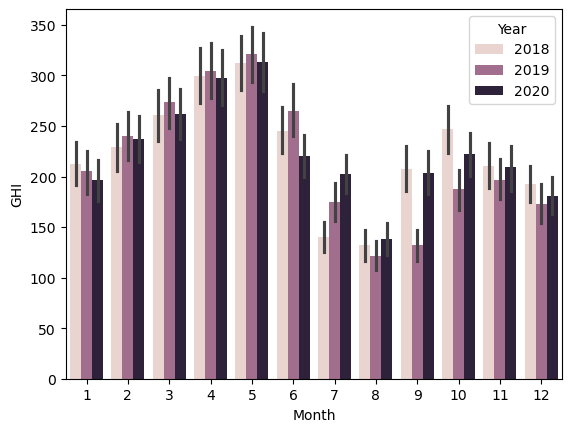

In [348]:
sns.barplot(data=df_final, x="Month",y="GHI",hue='Year')
plt.show()

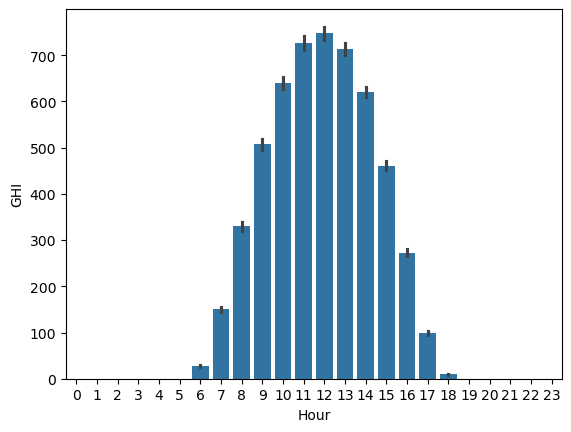

In [349]:
sns.barplot(data=df_final,y="GHI",x="Hour")
plt.show()

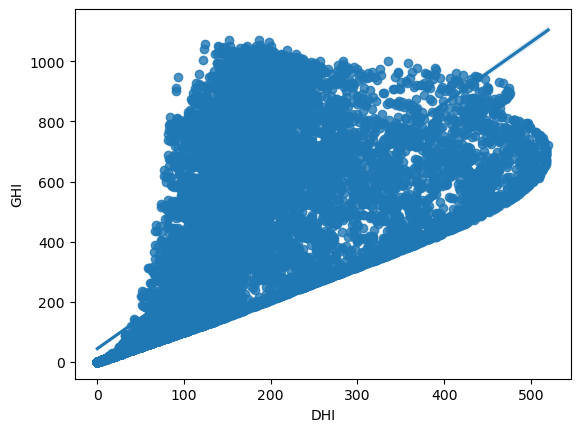

In [350]:
sns.regplot(data=df_final,x="DHI",y="GHI")
plt.show()

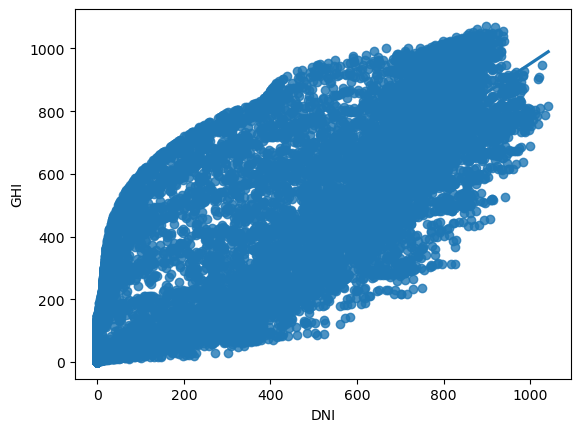

In [351]:
sns.regplot(data=df_final,x="DNI",y="GHI")
plt.show()

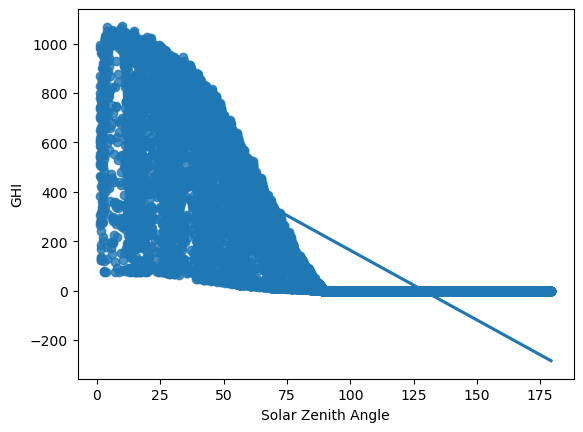

In [352]:
sns.regplot(data=df_final,x="Solar Zenith Angle",y="GHI")
plt.show()

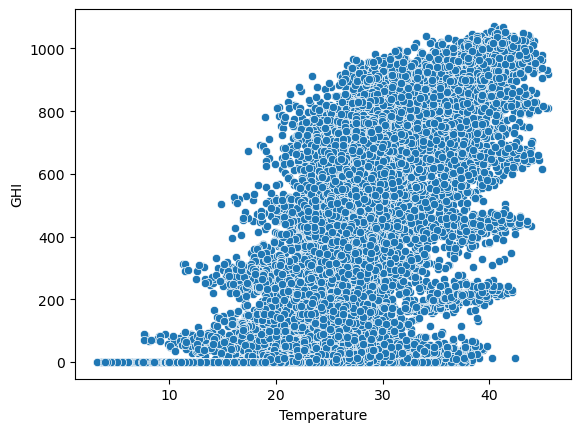

In [355]:
sns.scatterplot(data=df_final,x="Temperature",y="GHI")
plt.show()

In [357]:
df_final.corr().round(5)

,Year,Month,Day,Hour,GHI,DNI,DHI,Temperature,Pressure,Solar Zenith Angle,Surface Albedo,Cloud Type,Relative Humidity,Wind Speed
Year,1.00000,-0.00000,-0.00000,-0.00000,-0.00061,-0.00701,0.00996,-0.05362,0.01974,0.00020,-0.00085,0.04408,0.16340,-0.08014
Month,-0.00000,1.00000,0.01189,-0.00000,-0.08103,-0.10390,-0.00540,-0.15093,-0.03372,0.02679,-0.39667,0.19301,0.50078,-0.10045
Day,-0.00000,0.01189,1.00000,-0.00000,0.00289,0.01841,-0.01566,-0.00415,0.01667,-0.00088,-0.01624,-0.03088,-0.01058,-0.00467
Hour,-0.00000,-0.00000,-0.00000,1.00000,0.03636,0.03427,0.03804,0.22273,-0.02618,-0.07001,0.00000,0.01618,-0.11903,-0.09711
GHI,-0.00061,-0.08103,0.00289,0.03636,1.00000,0.89642,0.79789,0.62346,0.03245,-0.80738,0.11057,-0.19564,-0.42688,0.31162
DNI,-0.00701,-0.10390,0.01841,0.03427,0.89642,1.00000,0.53148,0.52366,0.19477,-0.67164,0.05772,-0.35683,-0.50562,0.18683
DHI,0.00996,-0.00540,-0.01566,0.03804,0.79789,0.53148,1.00000,0.53177,-0.13618,-0.80797,0.07964,0.07196,-0.21174,0.40347
Temperature,-0.05362,-0.15093,-0.00415,0.22273,0.62346,0.52366,0.53177,1.00000,-0.47078,-0.62380,0.52222,0.04329,-0.42747,0.35814
Pressure,0.01974,-0.03372,0.01667,-0.02618,0.03245,0.19477,-0.13618,-0.47078,1.00000,0.16498,-0.37049,-0.53403,-0.30853,-0.44291
Solar Zenith Angle,0.00020,0.02679,-0.00088,-0.07001,-0.80738,-0.67164,-0.80797,-0.62380,0.16498,1.00000,-0.12112,-0.01571,0.25625,-0.44347


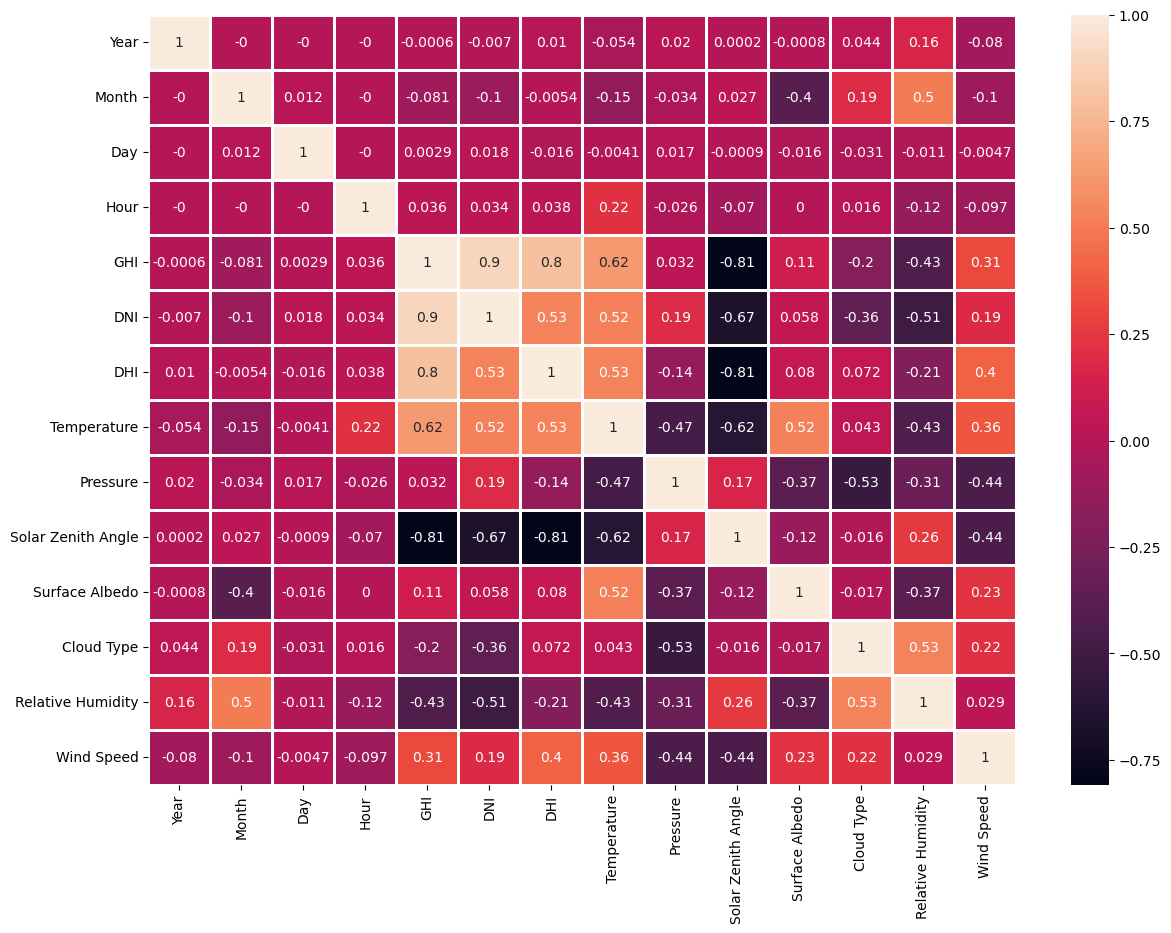

In [359]:
plt.figure(figsize=(14,10))
sns.heatmap(data=df_final.corr().round(4),annot=True,linewidth=2)
plt.show()

HANDLING OUTLIERS

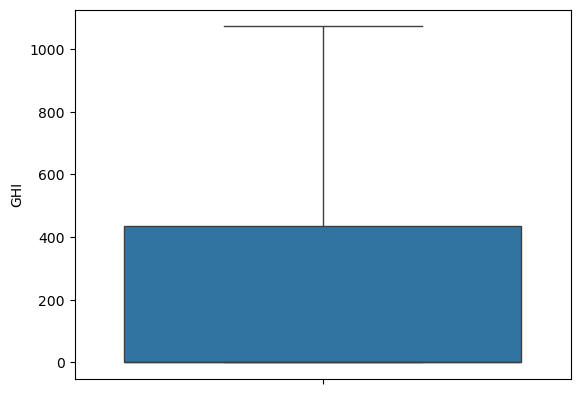

In [365]:
sns.boxplot(df_final['GHI'])
plt.show()
##no outliers in GHI

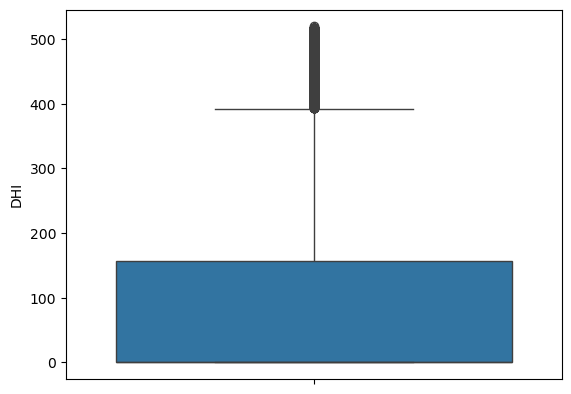

In [367]:
sns.boxplot(df_final['DHI'])
plt.show()

In [369]:
q1=df_final['DHI'].quantile(0.25)
q3=df_final['DHI'].quantile(0.75)
iqr=q3-q1
upper_limit_dhi=q3+1.5*iqr
lower_limit_dhi=q1-1.5*iqr
print(upper_limit_dhi)
print(lower_limit_dhi)
new_df=df_final.loc[(df_final['DHI']<upper_limit_dhi) & (df_final['DHI']>lower_limit_dhi)]
outliers=len(df_final)-len(new_df)
print("outliers of DHI are:",outliers)

392.5
-235.5
outliers of DHI are: 968


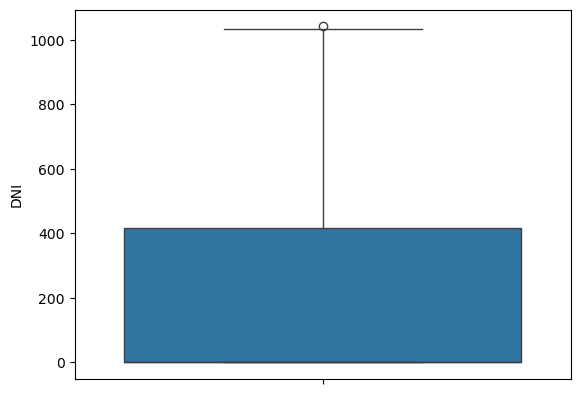

In [371]:
sns.boxplot(df_final['DNI'])
plt.show()

In [373]:
q1=df_final['DNI'].quantile(0.25)
q3=df_final['DNI'].quantile(0.75)
iqr=q3-q1
upper_limit_dni=q3+1.5*iqr
lower_limit_dni=q1-1.5*iqr
new_df=df_final[(df_final['DNI']<upper_limit_dni) & (df_final['DNI']>lower_limit_dni)]
outliers=len(df_final)-len(new_df)
print("outliers of DNI are:",outliers)

outliers of DNI are: 1


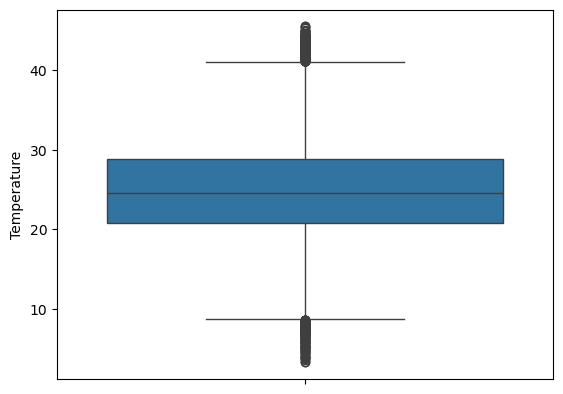

In [375]:
sns.boxplot(df_final['Temperature'])
plt.show()

In [377]:
q1=df_final['Temperature'].quantile(0.25)
q3=df_final['Temperature'].quantile(0.75)
iqr=q3-q1
upper_limit_temp=q3+1.5*iqr
lower_limit_temp=q1-1.5*iqr
new_df=df_final[(df_final['Temperature']<upper_limit_temp) & (df_final['Temperature']>lower_limit_temp)]
outliers=len(df_final)-len(new_df)
print("outliers of Temperature are:",outliers)

outliers of Temperature are: 681


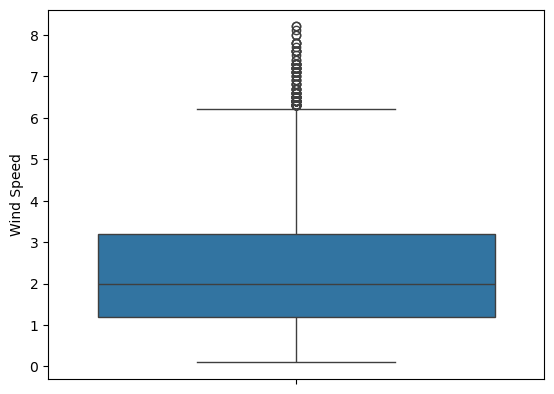

In [379]:
sns.boxplot(df_final['Wind Speed'])
plt.show()

In [381]:
q1=df_final['Wind Speed'].quantile(0.25)
q3=df_final['Wind Speed'].quantile(0.75)
iqr=q3-q1
upper_limit_wind=q3+1.5*iqr
lower_limit_wind=q1-1.5*iqr
new_df=df_final[(df_final['Wind Speed']<upper_limit_wind) & (df_final['Wind Speed']>lower_limit_wind)]
outliers=len(df_final)-len(new_df)
print("outliers of wind are:",outliers)

outliers of wind are: 173


In [383]:
df_final['DHI'].skew()

1.443037434328779

In [385]:
df_final['DNI'].skew()

1.118714867524225

In [387]:
df_final['Temperature'].skew()

0.1586263822993461

In [389]:
df_final['Wind Speed'].skew()

0.8632339457190923

## Outlier and Skew Analysis


## Model Training only for analysis:


In [393]:
X=df_final.drop('GHI',axis=1)
Y=df_final['GHI']

In [395]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [397]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [399]:
model=XGBRegressor()

In [401]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [403]:
Y_pred=model.predict(X_test)

In [405]:
mse=mean_squared_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)
print("Mean_Squared_Error:",mse)
print("R2 score:",r2)

Mean_Squared_Error: 27.512458757348632
R2 score: 0.9997144937515259


HYPERPARAMETER TUNING

n_estimators
lerning_rate
max_depth 
subsample
colsample_bytree
gamma
lambda
alpha

In [409]:
params={
    "learning_rate":[0.05,0.1,],
    "n_estimators":[100,200],
    "subsample":[0.8],
    "colsample_bytree":[0.8],
    "max_depth":[3,5],
    "gamma":[0.1]  
   
}

In [411]:
model_search=GridSearchCV(estimator=XGBRegressor(),param_grid=params,scoring='neg_mean_squared_error',cv=3,verbose=1)

In [413]:
model_search.fit(X_train,Y_train)
print("Done!!")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Done!!


In [414]:
model_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.8}

In [415]:
y_pred_tuned=model_search.best_estimator_.predict(X_test)

In [416]:
from sklearn.metrics import r2_score

In [417]:
r2=r2_score(Y_test,y_pred_tuned)
print("Score is:",r2)

Score is: 0.9996593594551086


## Major Analysis and steps:


## Model Analysis after dropping DHI,DNI and Solar Zenith Angle from the train and test dataset

In [427]:
X_new=df_final.drop(['GHI','DHI','DNI','Solar Zenith Angle'],axis=1)
Y_new=df_final['GHI']

In [429]:
model_new=XGBRegressor()

In [431]:
X_new_train,X_new_test,Y_new_train,Y_new_test=train_test_split(X_new,Y_new,test_size=0.2)

In [433]:
params={
    "learning_rate":[0.05,0.1,],
    "n_estimators":[100,200],
    "subsample":[0.8],
    "colsample_bytree":[0.8],
    "max_depth":[3,5],
    "gamma":[0.1]  
   
}

In [443]:
model_search_new=GridSearchCV(estimator=XGBRegressor(),param_grid=params,scoring='neg_mean_squared_error',cv=3,verbose=1)

In [445]:
model_search_new.fit(X_new_train,Y_new_train)
print("Done!!")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Done!!


In [447]:
model_search_new.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.8}

In [449]:
y_pred_tuned_new=model_search_new.best_estimator_.predict(X_new_test)

In [451]:
r2=r2_score(Y_new_test,y_pred_tuned_new)
print("Score is:",r2)

Score is: 0.9668948650360107


<<---------------------------------------------------------------------------------------------------------------------------------------------------->>

After all the data analysis and testing we observe that r2 score becomes 0.96 after removing DHI,DNI and Solar Zenith Angle which was actually causing the data leakage. The new version of data is much better than the previous one!!

In [456]:
df_new_final=df_final.drop(['DHI','DNI','Solar Zenith Angle'], axis=1)    ##storing into new dataframe for convinience.

In [468]:
##final analysis
df_new_final.head()

print("Nulls and Missing values:\n", df_new_final.isnull().value_counts())
print("\n\nDuplicates:", df_new_final.duplicated().value_counts())


Nulls and Missing values:
 Year   Month  Day    Hour   GHI    Temperature  Pressure  Surface Albedo  Cloud Type  Relative Humidity  Wind Speed
False  False  False  False  False  False        False     False           False       False              False         26280
Name: count, dtype: int64


Duplicates: False    26280
Name: count, dtype: int64


## Conclusion


We conclude that the processed dataset is now free of nulls and duplicates and also the data leakage causing features are handled.
The dataset has been tested on xgb model for analysis purpose only.
This confirms that the data is now fit for training and testing on main model.                                       